In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Surya/Desktop/Mini Project/final/datasets/global_recovered.csv')

In [3]:
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33723,33875,34037,34204,34385,34517,34675,34818,34923,35047
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,943,945,945,1054,1054,1164,1164,1164
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1288,1289,1301,1324,1332,1401,1405,1443,1445,1445
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,91,91,91,91,91,91,91,92,92,92
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,400121,409771,419513,428953,438883,448263,456347,467286,478077,488231
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,41434,41605,41659,41693,41941,42069,42231,42369,42551,42608
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,110,110,110,110,110,110,110,110,110,110
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994


In [4]:
column_values = df.keys()

recovered_cases = df.loc[:, column_values[4]:column_values[66]]

date_values = recovered_cases.keys()
recovered_records = []

for i in date_values:
    cases_sum = recovered_cases[i].sum()
    recovered_records.append(cases_sum)

days_x = np.array([day for day in range(len(date_values))])
days_x = days_x.reshape(-1,1)
recovered_records = np.array(recovered_records)
recovered_records = recovered_records.reshape(-1, 1)

forecasting_days = 10
x_plus_10_days = np.array([day for day in range(len(date_values)+forecasting_days)])
x_plus_10_days = x_plus_10_days.reshape(-1,1)
all_days=(np.array([day for day in range(len(date_values))])).reshape(-1,1)

copy_of_recovered=recovered_records

In [5]:
rolling_mean=pd.DataFrame(copy_of_recovered).rolling(window=3).mean()
print(rolling_mean)

                0
0             NaN
1             NaN
2       31.333333
3       35.000000
4       42.333333
..            ...
58   85227.333333
59   88010.333333
60   92319.333333
61   95968.666667
62  101409.333333

[63 rows x 1 columns]


In [6]:
rolling_mean.fillna(rolling_mean.mode(), inplace=True)
print(rolling_mean.isnull().sum())

0    0
dtype: int64


In [7]:
cases_y=np.array(rolling_mean).reshape(-1,1)

In [8]:
for i in rolling_mean:
    print(i)

0


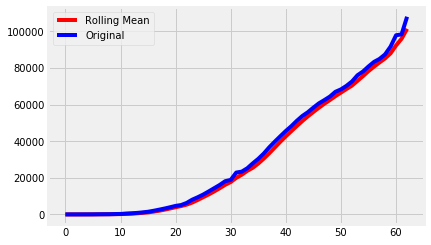

In [9]:
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(recovered_records, color='blue', label='Original')
plt.legend(loc='best')

In [10]:
train_cases_x, test_cases_x, train_cases_y, test_cases_y=train_test_split(days_x,cases_y, test_size=0.10, shuffle=True,random_state=4) 

The reported Mean Absolute Error for LR is :10601.859243964356  || Actual Values: 17016
The reported Mean Squared Error for LR is :123043475.0369506  || Actual Values: 480922814


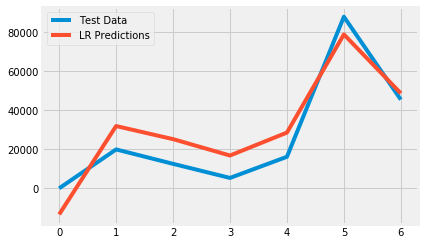

In [11]:
#linearregression
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression(normalize=True, fit_intercept=True,n_jobs=-1)
model_linear.fit(train_cases_x, train_cases_y)
linear_predictions = model_linear.predict(test_cases_x)
linear_predictions_all = model_linear.predict(x_plus_10_days)
plt.plot(test_cases_y)
plt.plot(linear_predictions)
plt.legend(['Test Data', 'LR Predictions'])
print('The reported Mean Absolute Error for LR is :{}  || Actual Values: 17016'.format(mean_absolute_error(linear_predictions, test_cases_y)))
print('The reported Mean Squared Error for LR is :{}  || Actual Values: 480922814'.format(mean_squared_error(linear_predictions, test_cases_y)))

In [12]:
#svr predictions
svm_model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_model.fit(train_cases_x, train_cases_y.ravel())
svm_predictions = svm_model.predict(test_cases_x)
svm_predictions_all = svm_model.predict(x_plus_10_days)

The reported Mean Absolute Error for SVM is :10496.379380279748 || Actual Values:106739
The reported Mean Squared Error for SVM is :170772393.3938739 || Actual Values:13121148615


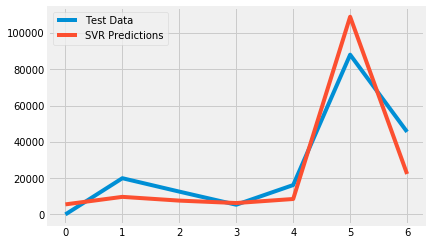

In [13]:
plt.plot(test_cases_y)
plt.plot(svm_predictions)
plt.legend(['Test Data', 'SVR Predictions'])
print('The reported Mean Absolute Error for SVM is :{} || Actual Values:106739'.format(mean_absolute_error(svm_predictions, test_cases_y)))
print('The reported Mean Squared Error for SVM is :{} || Actual Values:13121148615'.format(mean_squared_error(svm_predictions, test_cases_y)))

In [14]:
#lasso predictions
lasso_model = Lasso(normalize=True)
parameters={'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1e-1,1,5,10,15,20,25,30,35,40,45,50,55,60,65,85,95,100]}
lasso_model_gs=GridSearchCV(lasso_model,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_model_gs.fit(train_cases_x, train_cases_y)
#lasso_model_gs.fit(x_plus_10_days,np.array(rolling_mean).reshape(-1,1))
lasso_predictions = lasso_model_gs.predict(test_cases_x)
lasso_predictions_all = lasso_model_gs.predict(x_plus_10_days)


G:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1918614152.807698, tolerance: 4644832.902046464
  positive)
G:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1918108795.209416, tolerance: 4737461.921733333
  positive)
G:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1766611350.1089115, tolerance: 4035395.2349886424
  positive)
G:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1776349344.1122737, tolerance: 5022283.843159013
 

MAE:10601.859243964354  || Actual Values: 30705 
MSE:123043475.03695062  || Actual Values: 1462144344


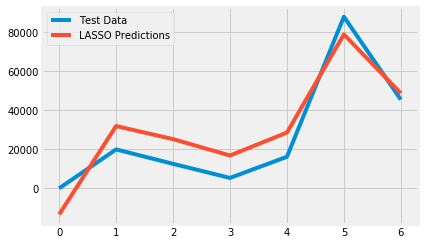

In [15]:
plt.plot(test_cases_y)
plt.plot(lasso_predictions)
plt.legend(['Test Data', 'LASSO Predictions'])
print('MAE:{}  || Actual Values: 30705 '.format(mean_absolute_error(lasso_predictions, test_cases_y)))
print('MSE:{}  || Actual Values: 1462144344'.format(mean_squared_error(lasso_predictions, test_cases_y)))

In [16]:
def plot_forecasts(var_x, var_y, predictions, model):
    plt.figure(figsize=(20, 7))
    plt.plot(var_x, var_y)
    plt.plot(x_plus_10_days, predictions, linestyle='dashed', color='red')
    plt.title('Number of  recovered cases Over Time', size=20)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of recoveries', size=30)
    plt.legend(['Recoveries', model], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

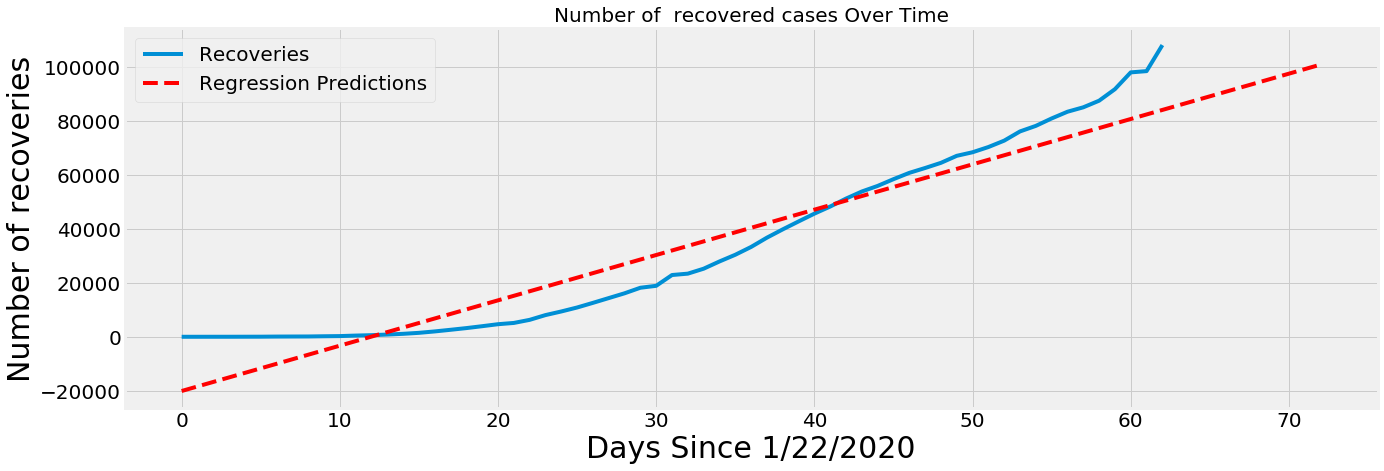

In [17]:
plot_forecasts(all_days, recovered_records, linear_predictions_all, 'Regression Predictions')

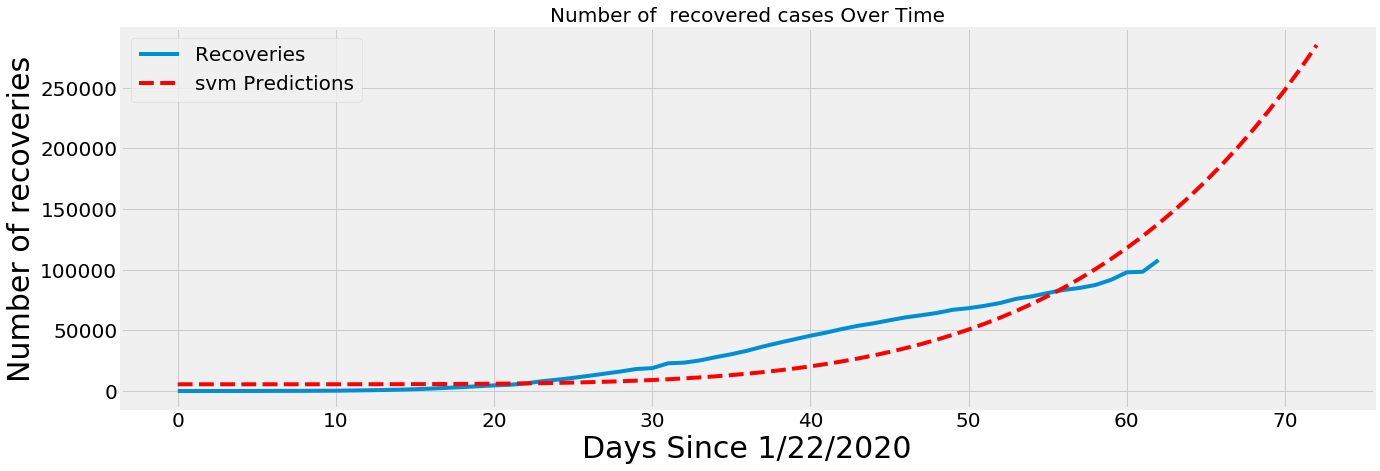

In [18]:
plot_forecasts(all_days, recovered_records, svm_predictions_all, 'svm Predictions')

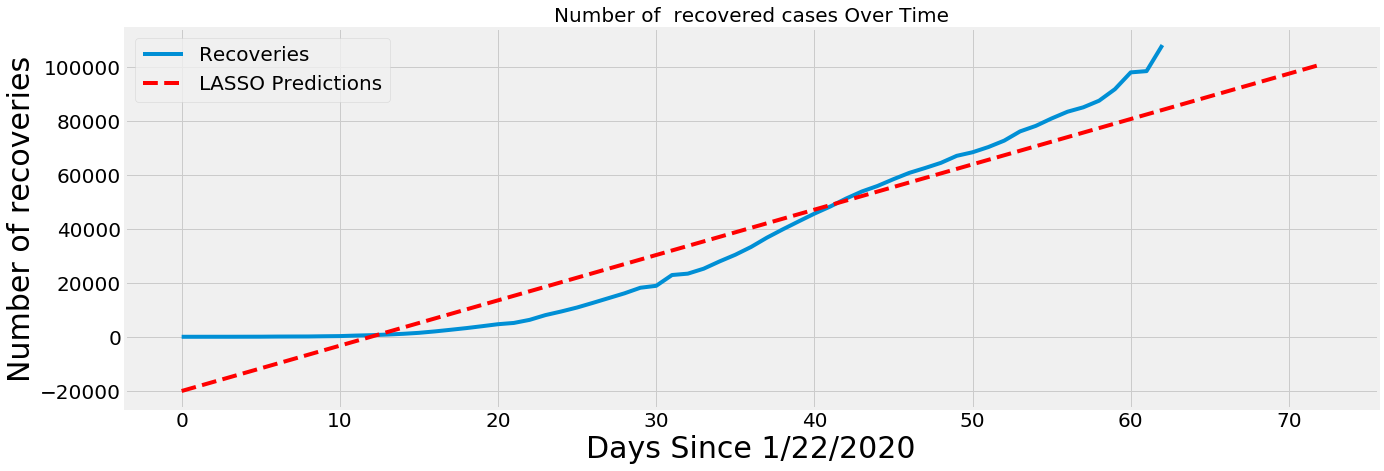

In [19]:
plot_forecasts(all_days, recovered_records, lasso_predictions_all, 'LASSO Predictions')